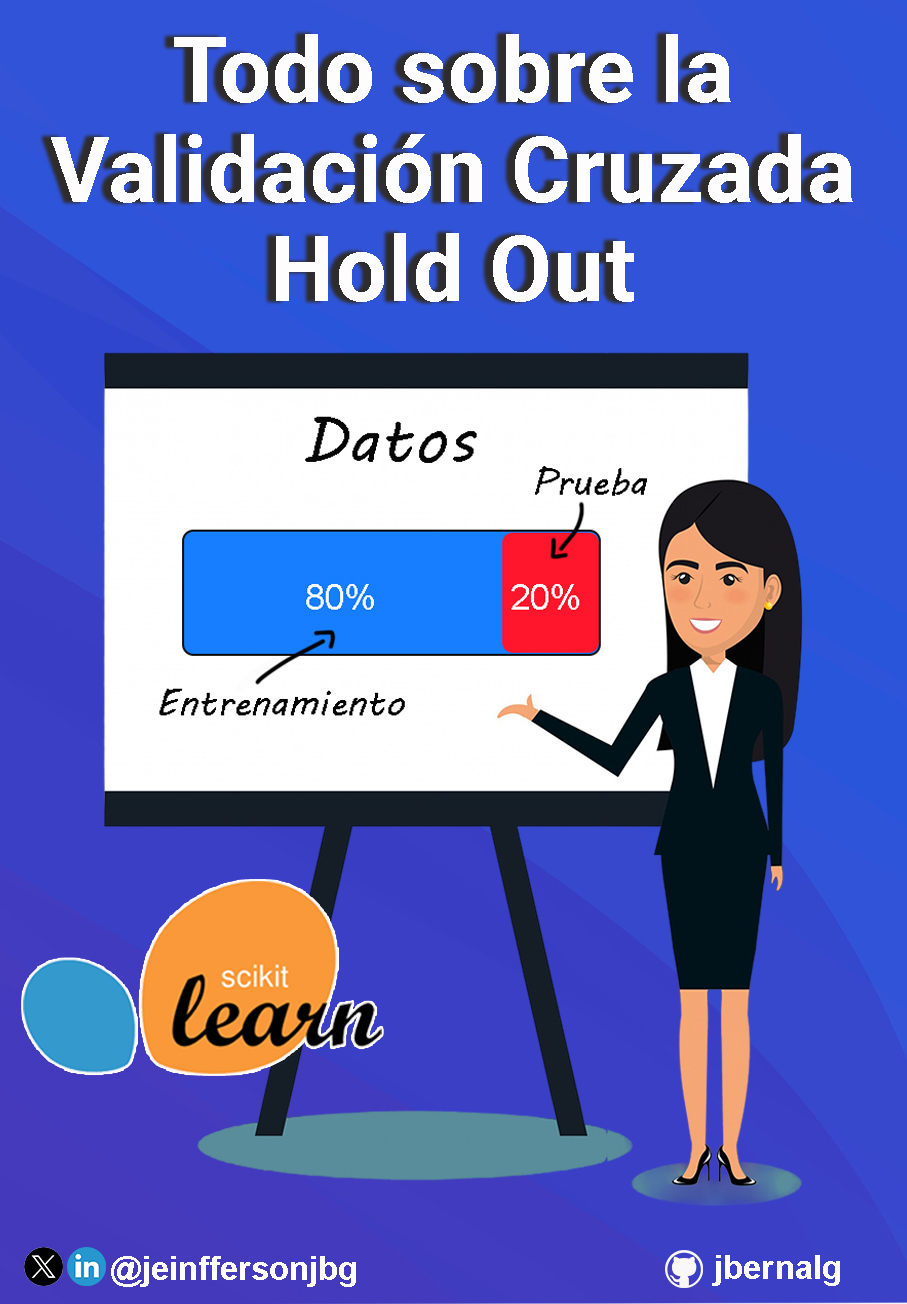

# Validación Cruzada

Es una técnica de evaluación del rendimiento de los modelos de Machine Learning que se utiliza para evaluar cómo se desempeña un modelo ante un conjunto de datos que no ha visto.

La idea principal es dividir los datos en varios subconjuntos, entrenar el modelo en algunos de estos subconjuntos y probarlo en los subconjuntos restantes.

En lo que sigue veremos una de las validaciones cruzadas más importantes: *Hold-Out Validation*. 

# **Hold-Out Validation**

Es la técnica más común utilizada para entrenar y probar el modelo. Consiste en dividir los datos en dos partes: uno para entrenamiento y otro para prueba. El proceso general es el siguiente:

1.- **Dividir los datos**: Los datos se dividen en dos partes, generalmente una proporción de 70-80% para entrenamiento y 20-30% para prueba.

2.- **Entrenar el modelo**: el modelo se entrena utilizando sólo el conjunto de entrenamiento.

3.- **Evaluar el modelo**: el modelo entrenado se evalúa en el conjunto de prueba para medir su rendimiento.

Su facilidad para implementar y entender y su bajo costo computacional hacen de esta técnica una de las favoritas. 

Su desventaja es que el rendimiento del modelo puede variar significativamente dependiendo de cómo se dividen los datos; además, no todos los datos se utilizan para entrenar el modelo, lo cual es un problema para conjuntos de datos pequeños.

## Implementación Manual de Hold-Out Validation

Vamos a crear un conjunto de datos simple para aplicar la hold-out validation manualmente.

In [99]:
# librerias
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

Generamos 100 observaciones con datos aleatorios para 5 variables predictoras y una objetivo.

In [123]:
# semilla
np.random.seed(42)

# 5 variables predictoras
X = pd.DataFrame({
    'var_1': np.random.rand(100),
    'var_2': np.random.rand(100),
    'var_3': np.random.rand(100),
    'var_4': np.random.rand(100),
    'var_5': np.random.rand(100),
})

# variable objetivo
# relacionada con algunas variables predictoras de manera lineal
y = 3*X['var_1'] + 2*X['var_2'] + X['var_3'] + np.random.rand(100)

# mostrar variables predictoras
X

var_1     var_2     var_3     var_4     var_5
0   0.374540  0.031429  0.642032  0.051682  0.103124
1   0.950714  0.636410  0.084140  0.531355  0.902553
2   0.731994  0.314356  0.161629  0.540635  0.505252
3   0.598658  0.508571  0.898554  0.637430  0.826457
4   0.156019  0.907566  0.606429  0.726091  0.320050
..       ...       ...       ...       ...       ...
95  0.493796  0.349210  0.522243  0.930757  0.353352
96  0.522733  0.725956  0.769994  0.858413  0.583656
97  0.427541  0.897110  0.215821  0.428994  0.077735
98  0.025419  0.887086  0.622890  0.750871  0.974395
99  0.107891  0.779876  0.085347  0.754543  0.986211

[100 rows x 5 columns]

La variable objetivo '*y*' está relacionada de manera lineal con las variables var_1, var_2 y var_3. De esta manera podemos tener certeza sobre los resultados esperados. Ahora, implementamos el Hold-Out Validation de forma manual para entender todo el proceso a detalle.

### **1.- Dividir los datos**
Dividimos los datos en conjunto de entrenamiento y de prueba. Para datos de entrenamiento le asignamos una proporción del 80% y para datos de prueba, el 20% restante.

In [124]:
# proporcion de datos de entrenamiento
ratio_train = 0.8
# canticad de datos de entrenamiento
tam_train = int(len(X)*ratio_train)
# mostrar cantidad
tam_train

80

Mezclamos los índices de las observaciones para asegurar que los datos de entrenamiento y de prueba se seleccionen aleatoriamente.

In [125]:
# genera una permutacion aleatoria de los indices de las observaciones
mez_indices = np.random.permutation(len(X))
mez_indices

array([32, 64, 93, 85, 30, 76, 73, 15, 23, 40, 10, 74, 29, 54,  5, 90, 31,
       87, 18, 89, 78, 57, 82, 83, 66, 96, 28, 61, 49, 52, 71,  8, 59, 56,
        3, 39, 19, 12, 43, 86, 65, 94, 53, 16, 38,  9, 67, 36, 24, 14, 34,
       37, 17, 84, 63, 42, 88, 22, 70,  2,  6, 50, 92, 58, 68, 75,  1, 27,
       13, 79, 80, 51,  7, 97, 35, 98, 95, 47, 62, 55, 46, 25, 72, 26, 44,
       77, 48, 33, 45, 11, 99,  0, 69, 20, 21, 60, 41, 91, 81,  4])

Una vez mezclados, seleccionamos los índices para el conjunto de entrenamiento y de prueba.

In [127]:
# indices del conjunto de entrenamiento
train_indices = mez_indices[:tam_train]
# indices del conjunto de prueba
test_indices = mez_indices[tam_train:]
# mostrar indices de entrenamiento
print(train_indices)
# mostrar indices de prueba
print(test_indices)

[32 64 93 85 30 76 73 15 23 40 10 74 29 54  5 90 31 87 18 89 78 57 82 83
 66 96 28 61 49 52 71  8 59 56  3 39 19 12 43 86 65 94 53 16 38  9 67 36
 24 14 34 37 17 84 63 42 88 22 70  2  6 50 92 58 68 75  1 27 13 79 80 51
  7 97 35 98 95 47 62 55]
[46 25 72 26 44 77 48 33 45 11 99  0 69 20 21 60 41 91 81  4]


Ya obtenido los índices, seleccionamos las observaciones correspondiente a cada conjunto.

In [131]:
# variables predictoras de entrenamiento y prueba
X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
# variable objetivo de entrenamiento y prueba
y_train, y_test = y.iloc[train_indices], y.loc[test_indices]
# mostrar dimensiones de datos de entrenamiento
print(X_train.shape, y_train.shape)
# mostrar dimensiones de datos de prueba
print(X_test.shape, y_test.shape)

(80, 5) (80,)
(20, 5) (20,)


### **2.-  Entrenar el modelo**
Creamos un modelo de regresión lineal, debido a la relación lineal entre las variables predictoras y la variable objetivo, y lo entrenamos con los datos de entrenamiento.

In [106]:
# creacion del modelo
model = LinearRegression()
# entrenamiento del modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

### **3.- Evaluar el modelo**
Para evaluarlo, obtenemos las predicciones del modelo con datos de entrenamiento y de prueba y a partir de ello, calculamos sus respectivas métricas.

In [107]:
# predicciones con datos de entrenamiento
y_train_pred = model.predict(X_train)
# predicciones con datos de prueba
y_test_pred = model.predict(X_test)

#----------- metricas para datos de entrenamiento
# R cuadrado: pasamos como parametro
# las predicciones (y_train_pred) y los valores de entrenamiento reales (y_train)
r2_train = r2_score(y_train, y_train_pred)
# MSE
mse_train = mean_squared_error(y_train, y_train_pred)

#----------- metricas para datos de prueba
# R cuadrado: pasamos como parametro
# las predicciones (y_test_pred) y los valores de prueba reales (y_train)
r2_test = r2_score(y_test, y_test_pred)
# MSE
mse_test = mean_squared_error(y_test, y_test_pred)

# mostrar resultados
print(f'R^2 en datos de entrenamiento: {round(r2_train,4)}')
print(f'MSE en datos de entrenamiento: {round(mse_train,4)}')
print(f'R^2 en datos de prueba: {round(r2_test,4)}')
print(f'MSE en datos de prueba: {round(mse_test,4)}')



R^2 en datos de entrenamiento: 0.9327
MSE en datos de entrenamiento: 0.0842
R^2 en datos de prueba: 0.937
MSE en datos de prueba: 0.047


> De esta manera vemos cómo se desempeña el modelo en el entrenamiento y en presencia de nuevo datos. Las métricas muestran que los valores de R cuadrado son muy similares en ambos casos lo que implica una buena generalización del modelo.

## Implementación de Hold-Out Validation con Scikit Learn

Podemos reducir el paso 1 a unas pocas líneas de código con el método *train_test_split* de la librería Scikit Learn tal como sigue:

### **1.- Dividir los datos**

In [133]:
# libreria para dividir los datos
from sklearn.model_selection import train_test_split

# datos de entrenamiento y prueba
# test_size: proporcion de datos de prueba
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=4)

# mostrar dimensiones de datos de entrenamiento
print(X_train_2.shape, y_train_2.shape)
# mostrar dimensiones de datos de prueba
print(X_test_2.shape, y_test_2.shape)

(80, 5) (80,)
(20, 5) (20,)


Vemos que el método *train_test_split* divide los datos en la misma proporción que la implementacion manual.

### **2.-  Entrenar el modelo**
Creamos un modelo de regresión lineal y lo entrenamos con los datos de entrenamiento.

In [134]:
# creacion del modelo
model2 = LinearRegression()
# entrenamiento del modelo con los datos de entrenamiento
model2.fit(X_train, y_train)

LinearRegression()

### **3.- Evaluar el modelo**
Para evaluarlo, obtenemos las predicciones del modelo con datos de entrenamiento y de prueba y a partir de ello, calculamos sus respectivas métricas.

In [135]:
# predicciones con datos de entrenamiento
y_train_pred = model2.predict(X_train_2)
# predicciones con datos de prueba
y_test_pred = model2.predict(X_test_2)

#----------- metricas para datos de entrenamiento
# R cuadrado: pasamos como parametro
# las predicciones (y_train_pred) y los valores de entrenamiento reales (y_train_2)
r2_train = r2_score(y_train_2, y_train_pred)
# MSE
mse_train = mean_squared_error(y_train_2, y_train_pred)

#----------- metricas para datos de prueba
# R cuadrado: pasamos como parametro
# las predicciones (y_test_pred) y los valores de prueba reales (y_test_2)
r2_test = r2_score(y_test_2, y_test_pred)
# MSE
mse_test = mean_squared_error(y_test_2, y_test_pred)

# mostrar resultados
print(f'R^2 en datos de entrenamiento: {round(r2_train,4)}')
print(f'MSE en datos de entrenamiento: {round(mse_train,4)}')
print(f'R^2 en datos de prueba: {round(r2_test,4)}')
print(f'MSE en datos de prueba: {round(mse_test,4)}')

R^2 en datos de entrenamiento: 0.9362
MSE en datos de entrenamiento: 0.0789
R^2 en datos de prueba: 0.9148
MSE en datos de prueba: 0.0682


> Las métricas obtenidas en este caso son muy similares a las obtenidas en la implementación manual. La ligera diferencia en los resultados se debe a la aleatoriedad en ambos métodos. De esta forma evaluamos el desempeño del modelo con menos líneas de código.